# Power Broadening

This is a notebook for plotting the figure for the broadening of the FWHM as a function of the amplitude as the third graph in my paper


In [1]:
%matplotlib ipympl
from scipy.signal import convolve
from matplotlib import pyplot as plt
from scriptos.fwhm_vs_amp import find_fwhm_vec_vs_rabi
from simi.args import *
from scriptos.spectroscopy_vs_amplitude import run_all, plot_1d, plot_2d
from simi.args import qubit_args, MHz
from matplotlib import pyplot as plt
from numpy import pi


def find_fwhm(x, y, z):
    FWHMs = []
    SNRs = []
    for zi in z:
        try:
            mu, fwhm, snr = FWHM(x, zi, plot=False, echo=False)
        except:
            fwhm = None
            snr = None
            print("no FWHM!")
        FWHMs.append(fwhm)
        SNRs.append(snr)

    return np.array(FWHMs), np.array(SNRs)

T1: 30.00 us
T2: 15.00 us
T2 limit: 21.22 kHz
broadening condition:
14.142135623730953 kHz


In [2]:
qubit_args["cutoff"] = 2e-4
qubit_args["rabi_points"] = 31
qubit_args["detuning_points"] = 101
qubit_args["detuning_span"] = 0.25 * MHz * 2 * pi
qubit_args["rabi_frequency"] = 50 * MHz * 2 * pi
qubit_args["eco_pulse"] = True
qubit_args["pulse_length"] = 40e-6
qubit_args["pulse_type"] = "lorentzian"
qubit_args["full_state"] = True


detunings, amplitudes, states = run_all(args=qubit_args)

z_echo = np.array([[states[i][j][2] for j in range(len(states[i]))] for i in range(len(states))])

z_echo = (-z_echo/2 +1/2)





Amplitude = 0/31


Amplitude = 1/31
Amplitude = 2/31
Amplitude = 3/31
Amplitude = 4/31
Amplitude = 5/31
Amplitude = 6/31
Amplitude = 7/31
Amplitude = 8/31
Amplitude = 9/31
Amplitude = 10/31
Amplitude = 11/31
Amplitude = 12/31
Amplitude = 13/31
Amplitude = 14/31
Amplitude = 15/31
Amplitude = 16/31
Amplitude = 17/31
Amplitude = 18/31
Amplitude = 19/31
Amplitude = 20/31
Amplitude = 21/31
Amplitude = 22/31
Amplitude = 23/31
Amplitude = 24/31
Amplitude = 25/31
Amplitude = 26/31
Amplitude = 27/31
Amplitude = 28/31
Amplitude = 29/31
Amplitude = 30/31


interactive(children=(IntSlider(value=15, description='Amplitude idx:', max=30), Output()), _dom_classes=('wid…

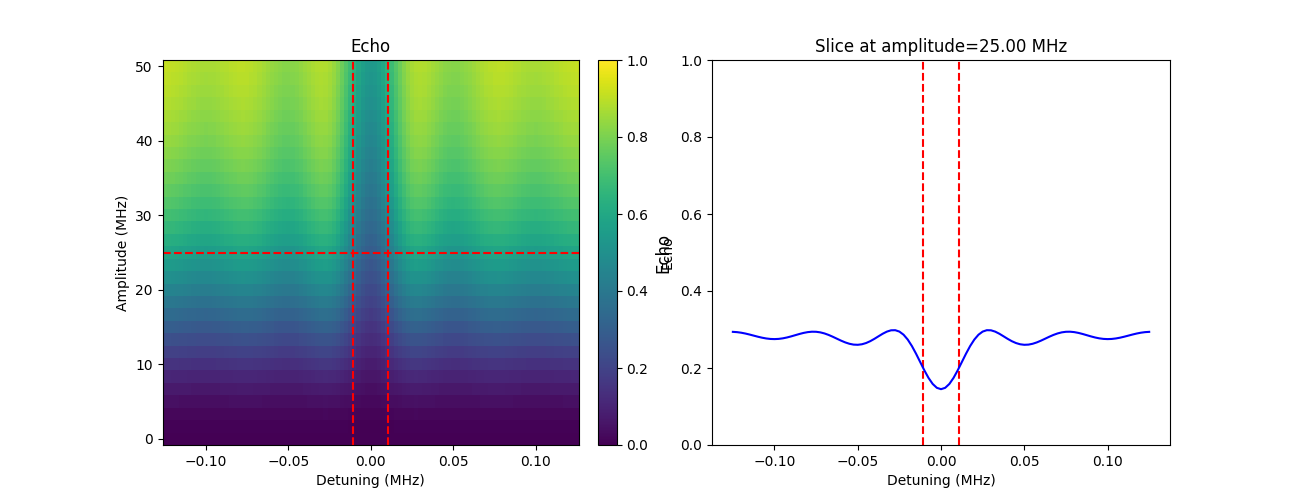

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# --- Your existing plot ---
fig, ax = plt.subplots(1, 2, figsize=(13, 5))



# fwhms, SNRs = find_fwhm(detunings, amplitudes, z_echo)

c = ax[0].pcolormesh(
        detunings / (2 * pi * MHz),
        amplitudes / (2 * pi * MHz),
        z_echo,
        vmin=0,
        vmax=1
    )


cbar = fig.colorbar(c, ax=ax[0], orientation='vertical', fraction=0.05, pad=0.04)
cbar.set_label("Echo", fontsize=12)

# fig.tight_layout()


# ------------------------------------------
# Add interactive slice viewer
# ------------------------------------------
@interact(
    idx=IntSlider(
        min=0, 
        max=len(amplitudes)-1, 
        step=1, 
        value=len(amplitudes)//2,
        description="Amplitude idx:"
    )
)
def show_slice(idx):
    ax[1].cla()  # clear second axis
    ax[0].cla()  # clear second axis
    c = ax[0].pcolormesh(
        detunings / (2 * pi * MHz),
        amplitudes / (2 * pi * MHz),
        z_echo,
        vmin=0,
        vmax=0.5
    )
    # ax[0].plot(fwhms/MHz/2/pi/2, amplitudes/2/pi/MHz, 'r.')
    # ax[0].plot(-fwhms/MHz/2/pi/2, amplitudes/2/pi/MHz, 'r.')

    ax[0].axvline(x=T2_limit/MHz/2, color='r', linestyle='--')
    ax[0].axvline(x=-T2_limit/MHz/2, color='r', linestyle='--')

    ax[1].axvline(x=T2_limit/MHz/2, color='r', linestyle='--')
    ax[1].axvline(x=-T2_limit/MHz/2, color='r', linestyle='--')

    ax[0].set_title("Echo", fontsize=12)
    ax[0].set_xlabel("Detuning (MHz)")
    ax[0].set_ylabel("Amplitude (MHz)")



    # Plot the slice (detuning axis)
    ax[1].plot(detunings/(2*pi*MHz), z_echo[idx, :], '-b')
    ax[1].set_title(f'Slice at amplitude={amplitudes[idx]/(2*pi*MHz):.2f} MHz')
    ax[1].set_xlabel("Detuning (MHz)")
    ax[1].set_ylabel("Echo")
    ax[1].set_ylim(0,1)
    ax[0].axhline(y=amplitudes[idx]/(2*pi*MHz), color='r', linestyle='--')
    fig.canvas.draw_idle()

interactive(children=(IntSlider(value=15, description='Amplitude idx', max=30), IntSlider(value=50, descriptio…

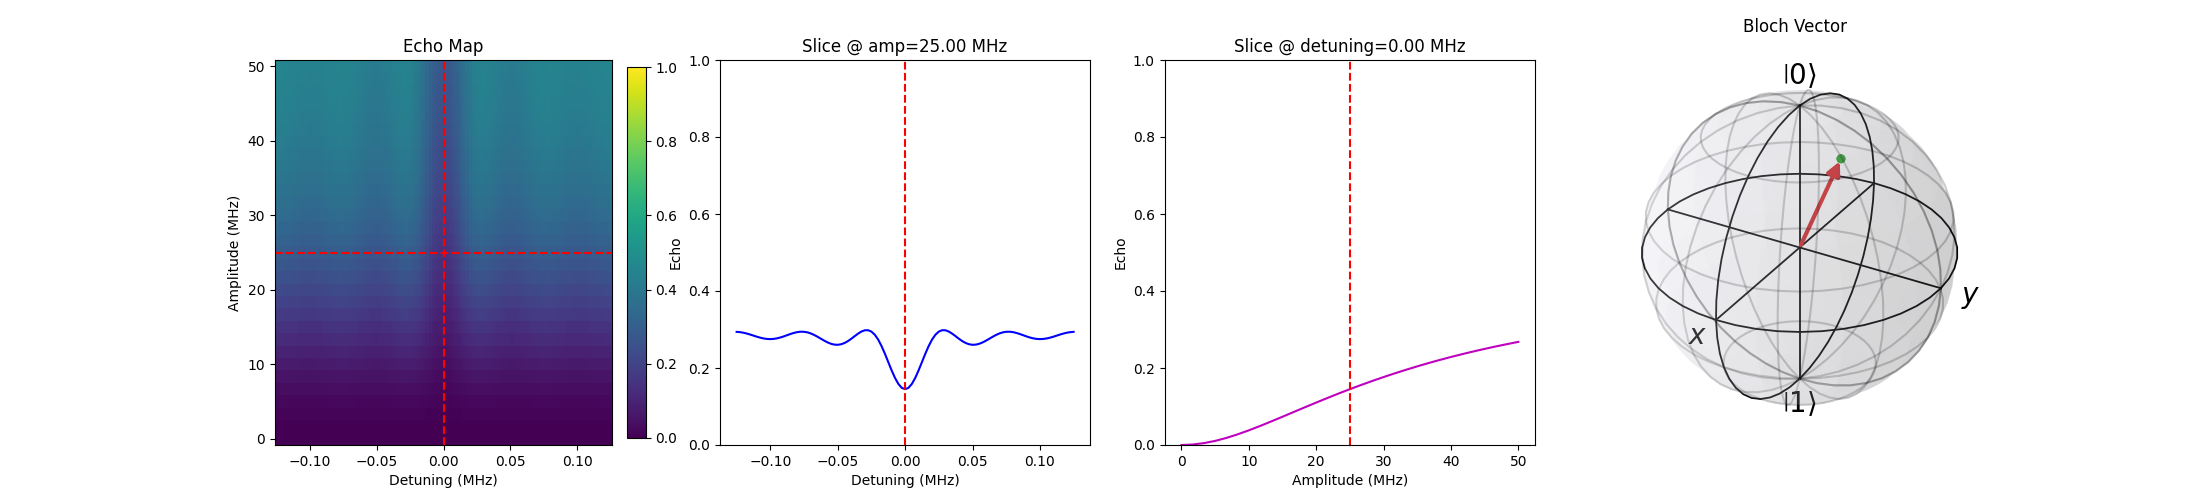

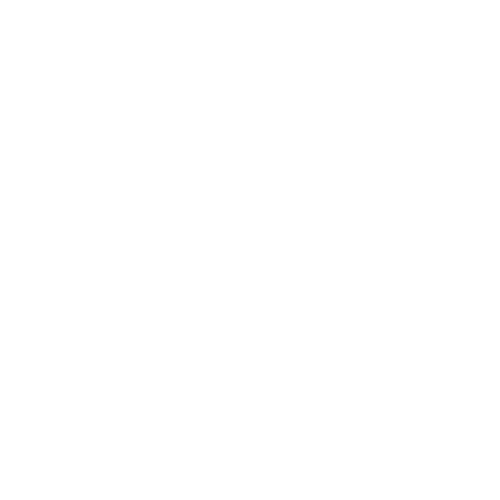

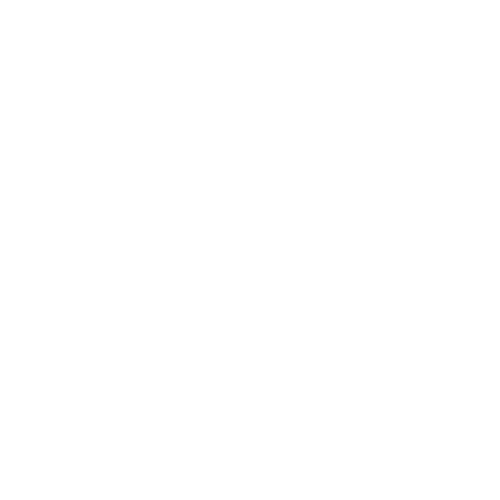

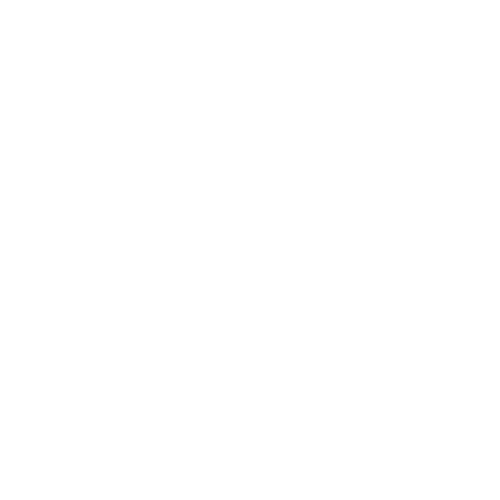

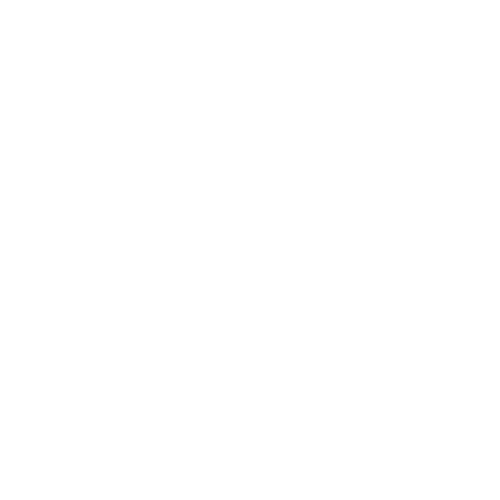

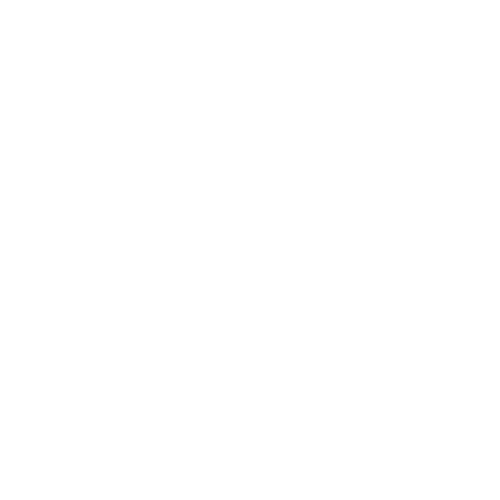

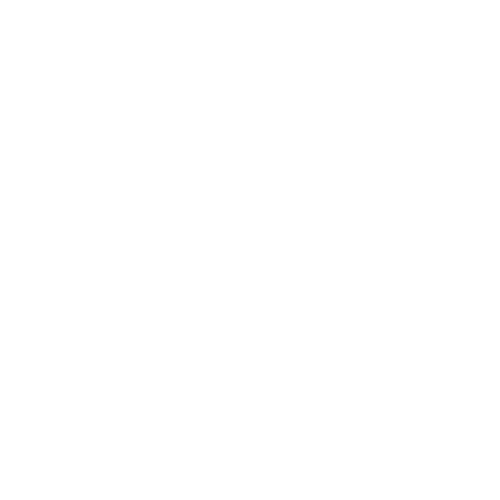

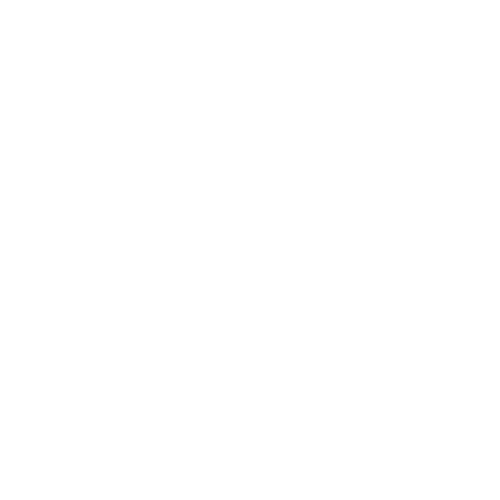

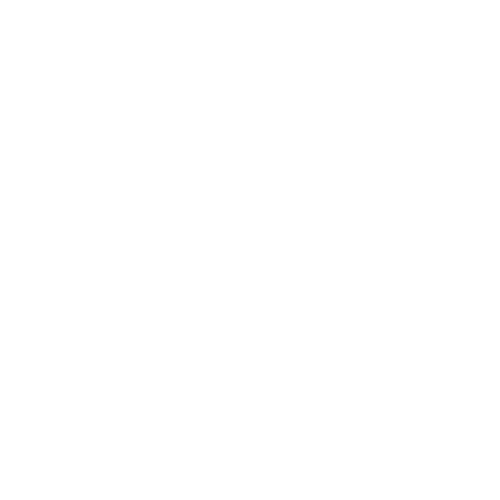

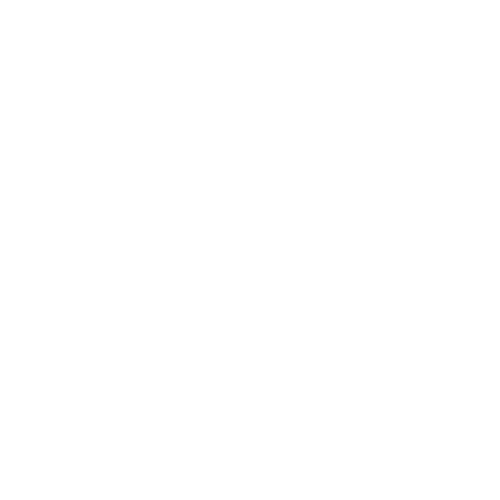

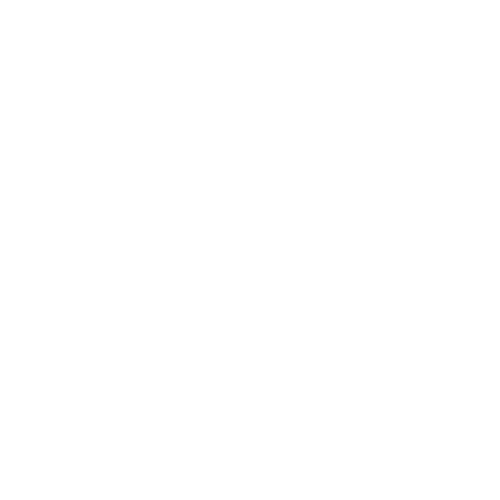

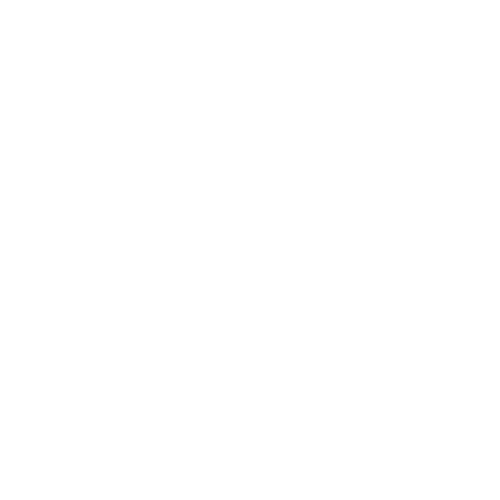

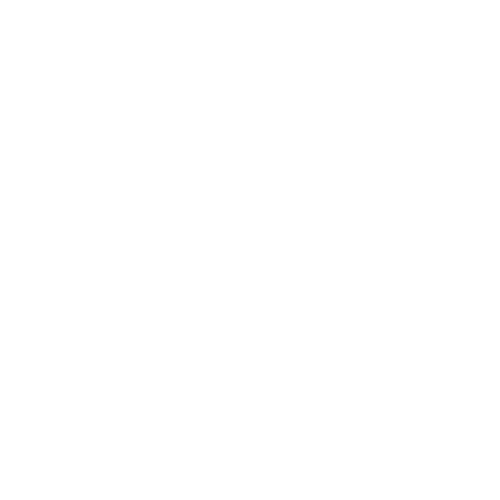

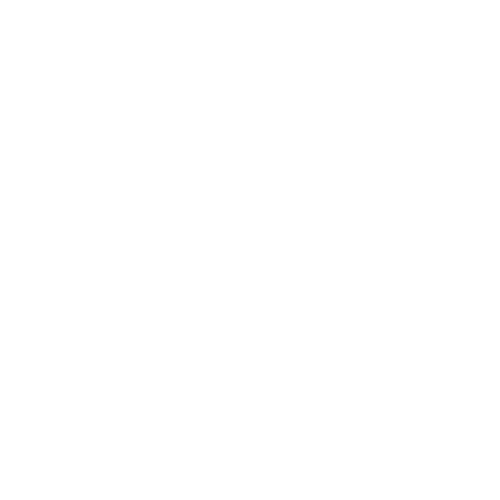

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   # needed for 3D proj
from ipywidgets import interact, IntSlider
from qutip import Bloch

# ---------------------------------------------------
# 4 PANELS: 3 normal + 1 dedicated 3D axis for Bloch
# ---------------------------------------------------
fig = plt.figure(figsize=(22,5))

ax_map        = fig.add_subplot(1,4,1)
ax_slice_det  = fig.add_subplot(1,4,2)
ax_slice_amp  = fig.add_subplot(1,4,3)
ax_bloch      = fig.add_subplot(1,4,4, projection='3d')   # <-- FIX HERE
ax_bloch.set_box_aspect((1,1,1))

c = ax_map.pcolormesh(
        detunings / (2 * pi * MHz),
        amplitudes / (2 * pi * MHz),
        z_echo,
        vmin=0,
        vmax=1
    )


cbar = fig.colorbar(c, ax=ax_map, orientation='vertical', fraction=0.05, pad=0.04)



# ---------------------------------------------------
# INTERACTIVE DASHBOARD
# ---------------------------------------------------
@interact(
    a_idx=IntSlider(min=0, max=len(amplitudes)-1, step=1,
                    value=len(amplitudes)//2, description="Amplitude idx"),
    d_idx=IntSlider(min=0, max=len(detunings)-1, step=1,
                    value=len(detunings)//2, description="Detuning idx")
)
def dashboard(a_idx, d_idx):

    # ===========================================================
    # (1) ECHO 2D MAP
    # ===========================================================
    ax_map.cla()
    ax_map.pcolormesh(
        detunings/(2*pi*MHz),
        amplitudes/(2*pi*MHz),
        z_echo,
        vmin=0, vmax=1, cmap='viridis'
    )
    ax_map.axhline(amplitudes[a_idx]/(2*pi*MHz), color='r', linestyle='--')
    ax_map.axvline(detunings[d_idx]/(2*pi*MHz), color='r', linestyle='--')
    ax_map.set_title("Echo Map")
    ax_map.set_xlabel("Detuning (MHz)")
    ax_map.set_ylabel("Amplitude (MHz)")

    # ===========================================================
    # (2) SLICE VS DETUNING
    # ===========================================================
    ax_slice_det.cla()
    ax_slice_det.plot(detunings/(2*pi*MHz), z_echo[a_idx, :], '-b')
    ax_slice_det.axvline(detunings[d_idx]/(2*pi*MHz), color='r', linestyle='--')
    ax_slice_det.set_ylim(0, 1)
    ax_slice_det.set_title(f"Slice @ amp={amplitudes[a_idx]/(2*pi*MHz):.2f} MHz")
    ax_slice_det.set_xlabel("Detuning (MHz)")
    ax_slice_det.set_ylabel("Echo")

    # ===========================================================
    # (3) SLICE VS AMPLITUDE
    # ===========================================================
    ax_slice_amp.cla()
    ax_slice_amp.plot(amplitudes/(2*pi*MHz), z_echo[:, d_idx], '-m')
    ax_slice_amp.axvline(amplitudes[a_idx]/(2*pi*MHz), color='r', linestyle='--')
    ax_slice_amp.set_ylim(0, 1)
    ax_slice_amp.set_title(f"Slice @ detuning={detunings[d_idx]/(2*pi*MHz):.2f} MHz")
    ax_slice_amp.set_xlabel("Amplitude (MHz)")
    ax_slice_amp.set_ylabel("Echo")

    # ===========================================================
    # (4) BLOCH SPHERE (now correctly embedded)
    # ===========================================================
    ax_bloch.cla()
    vec = states[a_idx][d_idx]

    b = Bloch(axes=ax_bloch)

    b.clear()

    # Style
    b.sphere_alpha = 0.15
    b.sphere_color = [0.9, 0.9, 0.95]
    b.frame_color  = 'black'
    b.frame_width  = 1.3
    b.vector_color = ['#d62728']
    b.point_color  = ['#2ca02c']
    b.point_marker = ['o']
    b.point_size   = [30]


    b.add_vectors(vec)
    b.add_points(vec)
    b.render()   # b.show() also works but render() avoids widget output

    ax_bloch.set_title("Bloch Vector", pad=25)

    fig.canvas.draw_idle()

 $\sigma$ = 1102.7 Hz


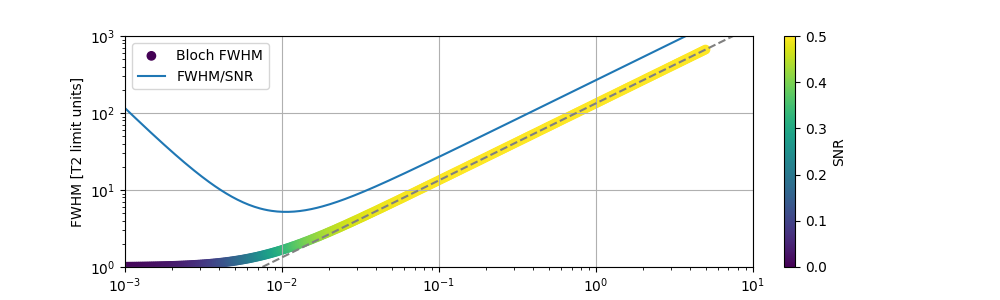

In [5]:
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(111)
find_fwhm_vec_vs_rabi(ax)




In [6]:
from simi.utils import *





def compute_fwhm(ax, pulse_length=40e-6, plot=False):
    qubit_args["cutoff"] = 2e-4
    qubit_args["rabi_points"] = 151
    qubit_args["detuning_points"] = 251
    qubit_args["detuning_span"] = 0.5 * MHz * 2 * pi
    qubit_args["rabi_frequency"] = 50 * MHz * 2 * pi
    qubit_args["echo"] = False
    qubit_args["pulse_length"] = pulse_length
    detunings, amplitudes, z_echo = run_all(args=qubit_args)

    fwhms, SNRs = find_fwhm(detunings, amplitudes, z_echo)

    if plot:
        ax.plot(
            amplitudes / 2 / pi / MHz,
            fwhms / T2_limit / 2 / pi,
            ".-",
            label=f"{pulse_length / 1e-6:.0f} us",
        )

        ax.scatter(
            amplitudes / 2 / pi / MHz, fwhms / T2_limit / 2 / pi, c=SNRs
        )

    return amplitudes, fwhms, SNRs


def plot_fwhm(ax, amplitudes, fwhms, SNRs, label=""):
    # ax.plot(
    #     amplitudes / 2 / pi / MHz,
    #     fwhms / T2_limit / 2 / pi,
    #     ".-",
    #     # label=f"{pulse_length / 1e-6:.0f} us",
    # )

    ax.plot(
        amplitudes / 2 / pi / MHz,
        fwhms / T2_limit / 2 / pi / SNRs,
        ".-",
        label=label,
    )

    ax.scatter(
        amplitudes / 2 / pi / MHz,
        fwhms / T2_limit / 2 / pi,
        c=SNRs,
        label=label,
        vmin=0,
        vmax=0.2,
    )

In [7]:


amps, fwhm_1,SNRs_1 = compute_fwhm(ax, 10e-6)
_, fwhm_2,SNRs_2 = compute_fwhm(ax, 30e-6)
_, fwhm_3,SNRs_3 = compute_fwhm(ax, 60e-6)
_, fwhm_4,SNRs_4 = compute_fwhm(ax, 90e-6)
_, fwhm_5,SNRs_5 = compute_fwhm(ax, 120e-6)
_, fwhm_6,SNRs_6 = compute_fwhm(ax, 150e-6)
_, fwhm_7,SNRs_7 = compute_fwhm(ax, 180e-6)






Amplitude = 0/151
Amplitude = 1/151
Amplitude = 2/151
Amplitude = 3/151
Amplitude = 4/151
Amplitude = 5/151
Amplitude = 6/151
Amplitude = 7/151
Amplitude = 8/151
Amplitude = 9/151
Amplitude = 10/151
Amplitude = 11/151
Amplitude = 12/151
Amplitude = 13/151
Amplitude = 14/151
Amplitude = 15/151
Amplitude = 16/151
Amplitude = 17/151
Amplitude = 18/151
Amplitude = 19/151
Amplitude = 20/151
Amplitude = 21/151
Amplitude = 22/151
Amplitude = 23/151
Amplitude = 24/151
Amplitude = 25/151
Amplitude = 26/151
Amplitude = 27/151
Amplitude = 28/151
Amplitude = 29/151
Amplitude = 30/151
Amplitude = 31/151
Amplitude = 32/151
Amplitude = 33/151
Amplitude = 34/151
Amplitude = 35/151
Amplitude = 36/151
Amplitude = 37/151
Amplitude = 38/151
Amplitude = 39/151
Amplitude = 40/151
Amplitude = 41/151
Amplitude = 42/151


Process ForkProcess-511:
Process ForkProcess-507:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/asafsolonnikov/.conda/envs/myenv/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/asafsolonnikov/.conda/envs/myenv/lib/python3.12/site-packages/qutip/solver/integrator/scipy_integrator.py", line 69, in _mul_np_vec
  File "/Users/asafsolonnikov/.conda/envs/myenv/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/asafsolonnikov/.conda/envs/myenv/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
      File "/Users/asafsolonnikov/.conda/envs/myenv/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/asafsolonnikov/.conda/envs/myenv/lib/python3.12/concurrent/futures/process.py", line 252, in _process_worke

KeyboardInterrupt: 

 $\sigma$ = 1102.7 Hz


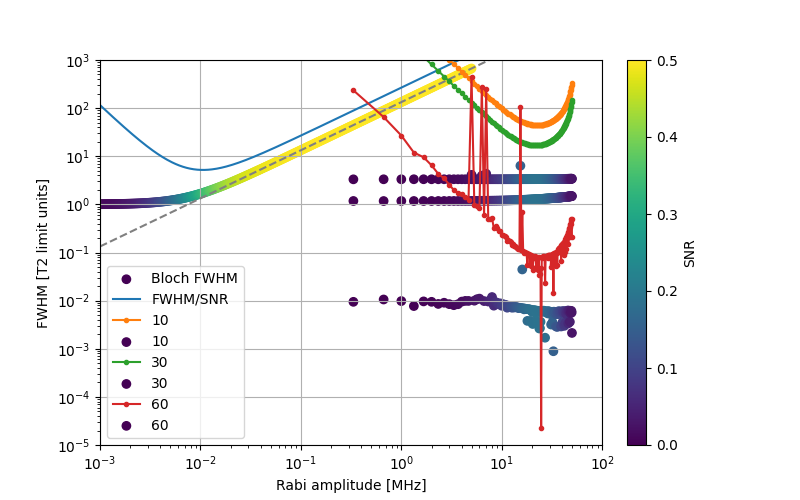

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

find_fwhm_vec_vs_rabi(ax)


len(SNRs)



plot_fwhm(ax, amps[1:], fwhm_1[1:], SNRs[1:], label="10")
plot_fwhm(ax, amps[1:], fwhm_2[1:], SNRs[1:], label="30")
plot_fwhm(ax, amps[1:], fwhm_3[1:], SNRs[1:], label="60")

# plt.xscale('linear')
# plt.yscale('linear')
plt.xlim(1e-3,1e2)
plt.ylim(1e-5,1e3)

plt.legend()

# plt.show()


